In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
mpl.style.use(['ggplot'])
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

In [ ]:
df = pd.read_csv('/content/FIFA22_official_data_clean_final.csv')

##	Phân tích thông tin cầu thủ 

In [ ]:
df['Height'] = df['Height'].str.strip('cm').astype(np.int64)
df['Weight'] = df['Weight'].str.strip('kg').astype(np.int64)

### Height

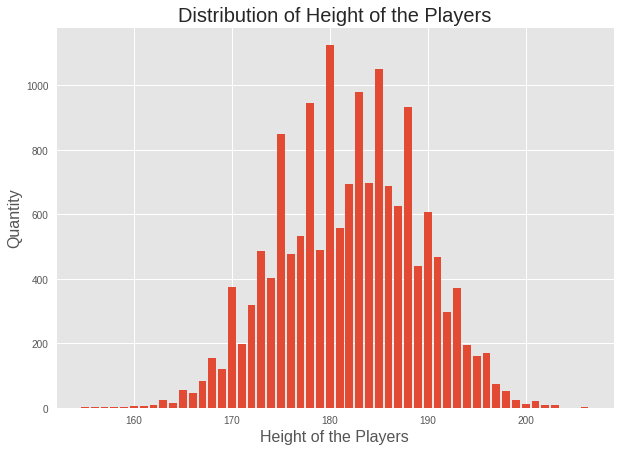

In [ ]:
x = df['Height'].value_counts().index
y = df['Height'].value_counts()
plt.figure(figsize=(10,7))
plt.bar(x, y)
plt.xlabel('Height of the Players', fontsize = 16)
plt.ylabel('Quantity', fontsize =16)
plt.title('Distribution of Height of the Players', fontsize = 20)
plt.show();

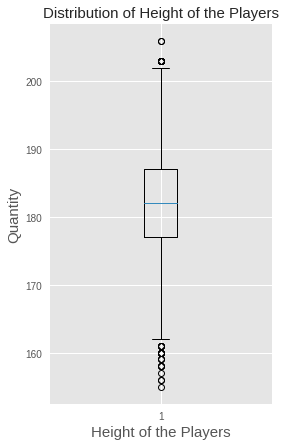

In [ ]:
fig = plt.figure(figsize =(4, 7))
plt.boxplot(df['Height'])
plt.xlabel('Height of the Players', fontsize = 15)
plt.ylabel('Quantity', fontsize =15)
plt.title('Distribution of Height of the Players', fontsize = 15)
plt.show()

### Weight

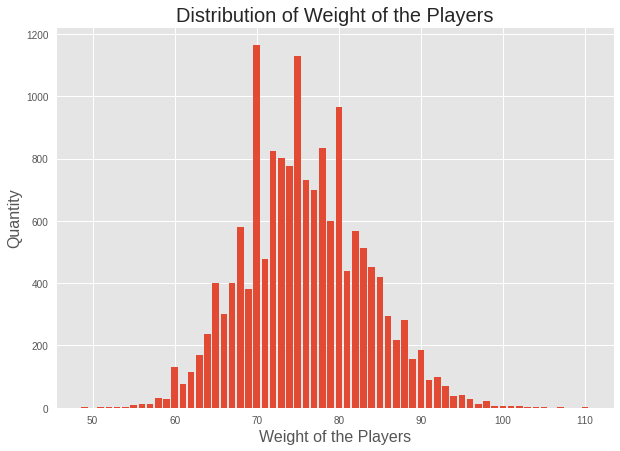

In [ ]:
x = df['Weight'].value_counts().index
y = df['Weight'].value_counts()
plt.figure(figsize=(10,7))
plt.bar(x, y)
plt.xlabel('Weight of the Players', fontsize = 16)
plt.ylabel('Quantity', fontsize =16)
plt.title('Distribution of Weight of the Players', fontsize = 20)
plt.show();

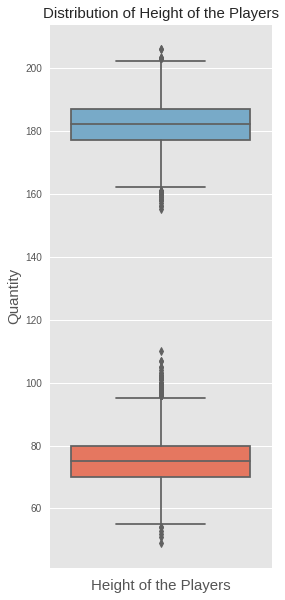

In [ ]:
fig = plt.figure(figsize =(4, 10))
sns.boxplot(y = df['Height'], palette = 'Blues')
sns.boxplot(y = df['Weight'], palette = 'Reds')
plt.xlabel('Height of the Players', fontsize = 15)
plt.ylabel('Quantity', fontsize =15)
plt.title('Distribution of Height of the Players', fontsize = 15)
plt.show()

### Value

In [ ]:
def normalizing_money(x):
    if '€' in str(x): 
      if 'M' in str(x):
        c = str(x).replace('€' , '')
        c = str(c).replace('M' , '')
        c = float(c) * 1000000
      elif 'K' in str(x):
        c = str(x).replace('€' , '')
        c = str(c).replace('K' , '')
        c = float(c) * 1000
      else:
        c = str(x).replace('€', '')
        c = float(c)
    return c

In [ ]:
df['Value'] = df['Value'].apply(lambda x : normalizing_money(x))
df['Wage'] = df['Wage'].apply(lambda x : normalizing_money(x))

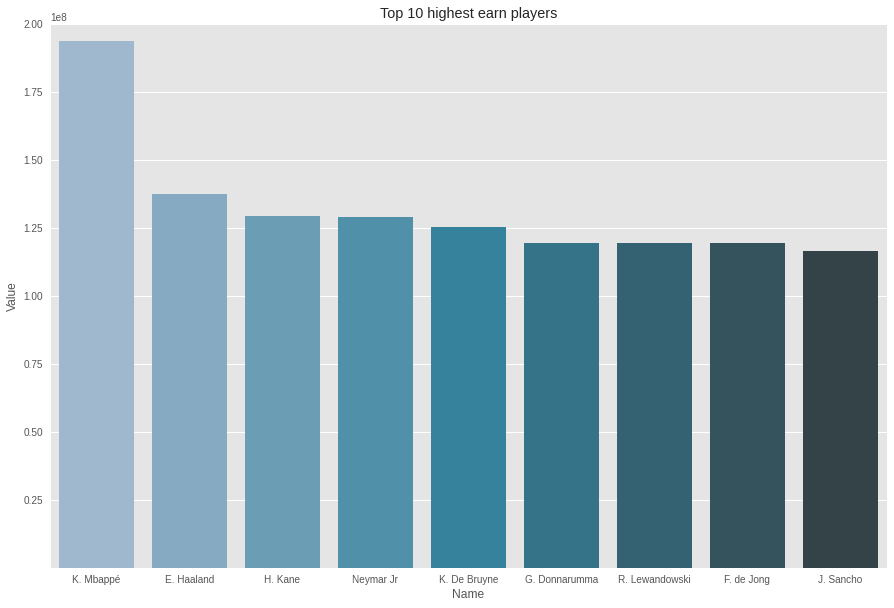

In [ ]:
df_final_highest_earn = pd.DataFrame.copy(df.sort_values(by = 'Value' , ascending = False).head(10))
plt.figure(1,figsize = (15,10))
sns.barplot(x ='Name' , y = 'Value' , data = df_final_highest_earn, palette='PuBuGn_d')
plt.xlabel('Name')
plt.ylabel('Value')
plt.title('Top 10 highest earn players')
plt.ylim(200000,200000000)
plt.show();

### Top clubs

In [ ]:
top_club = df['Club'].value_counts().head(20)

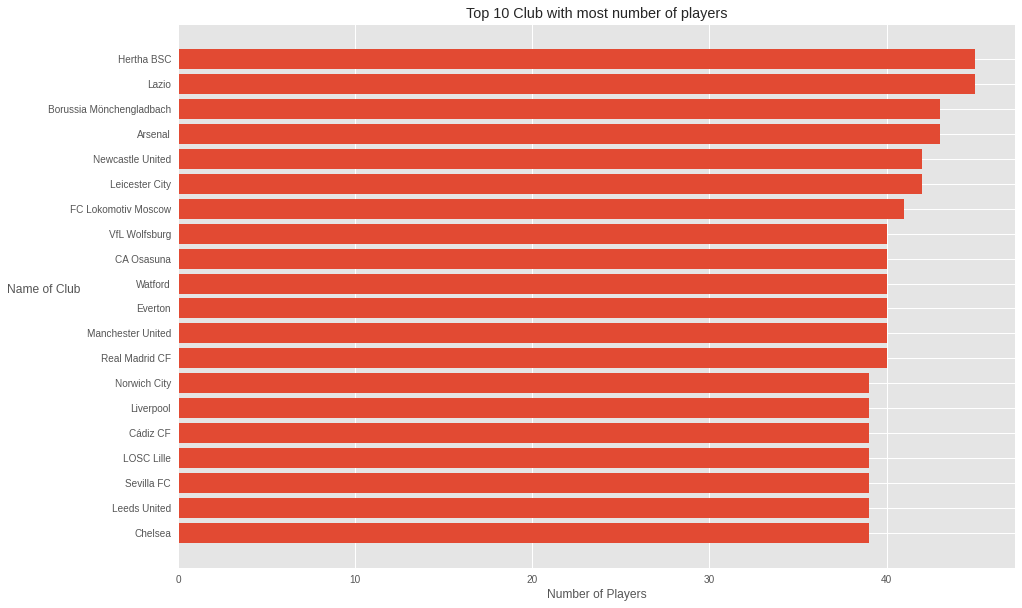

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
x = top_club.values
y = top_club.index
plt.barh(y, x, align='center')
plt.gca().invert_yaxis()
plt.xlabel('Number of Players')
plt.ylabel('Name of Club', rotation=0)
plt.title('Top 10 Club with most number of players')
plt.show();

### Correlation between values

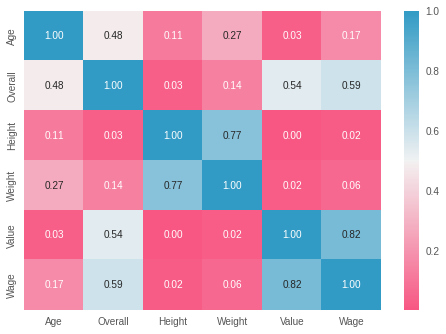

In [ ]:
sns.heatmap(df[['Age', 'Overall', 'Height', 'Weight', 'Value', 'Wage']].corr(), annot=True, fmt=".2f", cmap = cmap)

# Phân tích cách chỉ số cầu thủ

## Heatmap

In [ ]:
heatmap_total = df[df.columns[16:53]].corr()

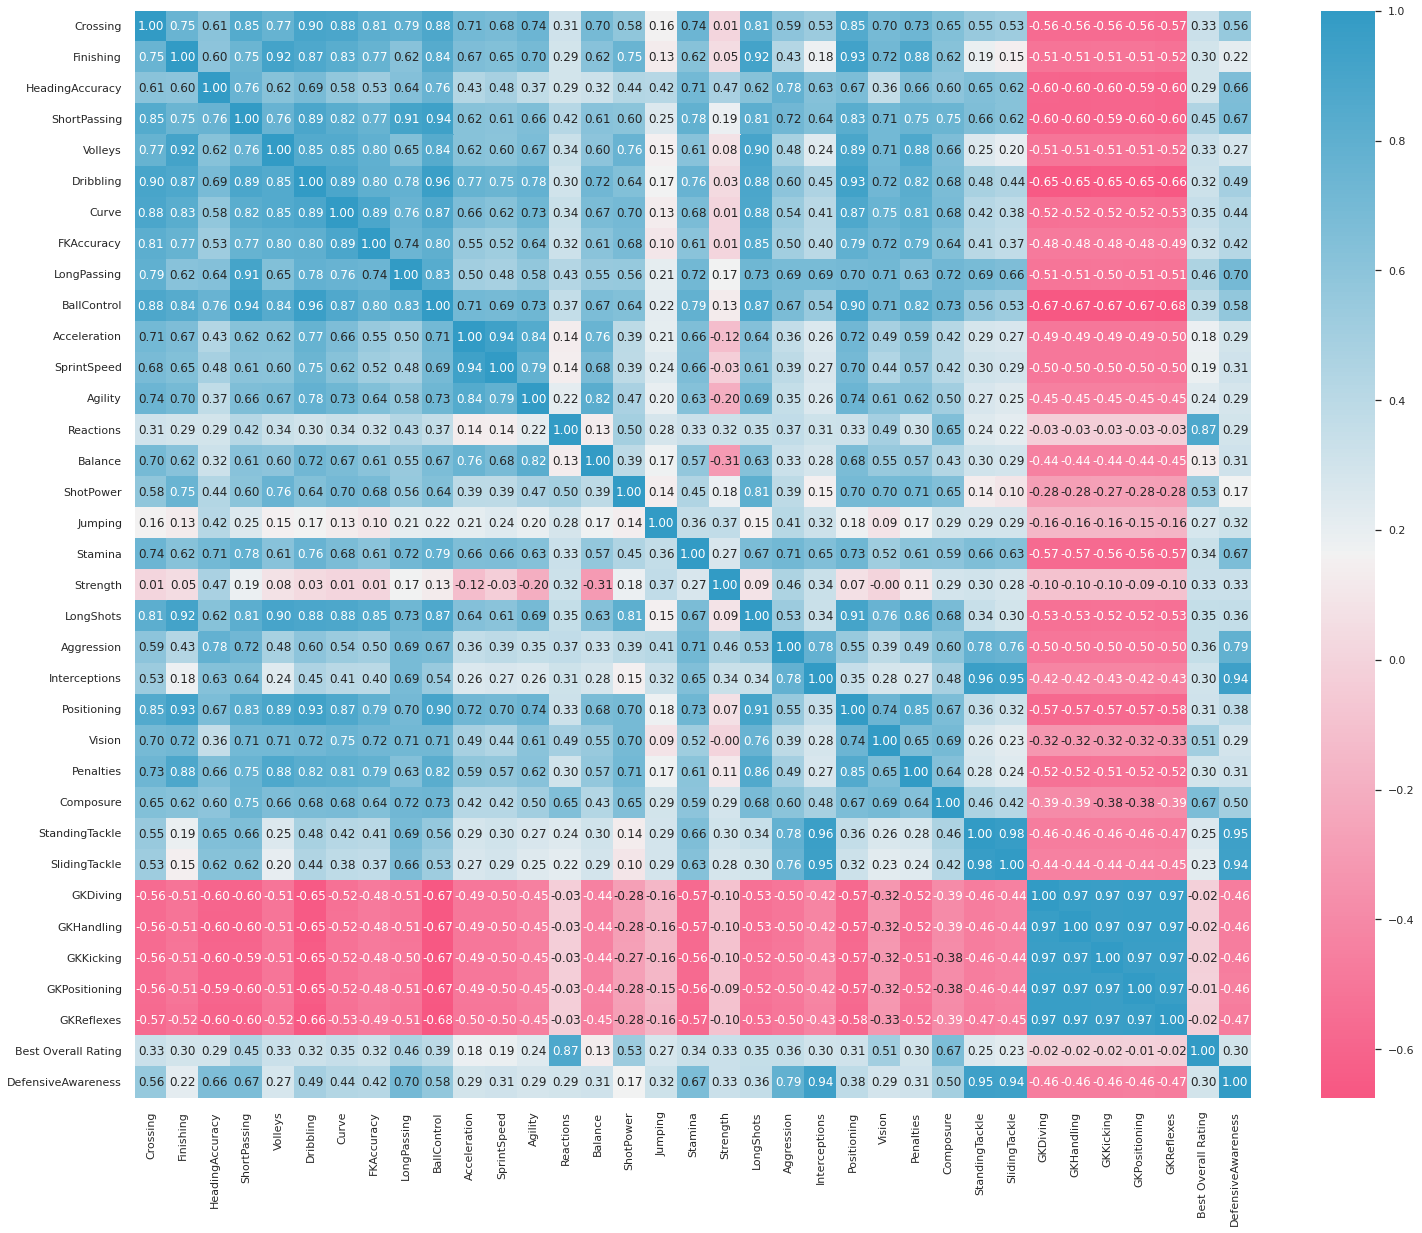

In [ ]:
sns.set(rc = {'figure.figsize':(25,20)})

sns.heatmap(heatmap_total, annot=True, fmt=".2f", cmap = cmap)

## Correlation between attributes and positions

In [ ]:
attacking = ['Crossing', 'Finishing', 'ShortPassing', 'Volleys']  #4
skill = ['Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl']  #5
movement = ['Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance'] #5
power = ['ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots']  #5
mentality = ['Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure']  #6
defending = ['StandingTackle', 'SlidingTackle']  #2
goalkeeping = ['GKDiving', 'GKKicking', 'GKPositioning', 'GKReflexes']  #4

In [ ]:
name_GePoint = ['attacking', 'skill', 'movement', 'power', 'mentality', 'defending', 'goalkeeping']

In [ ]:
df['GeneralPosition'] = ''
for i in range(df.shape[0]):
  if df['Best Position'][i] in ['ST', 'LW', 'RW', 'CF']:
    df['GeneralPosition'][i] = 'ST'
  elif df['Best Position'][i] in ['CM', 'CDM', 'CAM', 'RM', 'LM']:
    df['GeneralPosition'][i] = 'CM'
  elif df['Best Position'][i] in ['CB', 'RB', 'LB', 'RWB', 'LWB']:
    df['GeneralPosition'][i] = 'CB'
  elif df['Best Position'][i] == 'GK':
    df['GeneralPosition'][i] = 'GK'


In [ ]:
name_Position = ['ST', 'CM', 'CB', 'GK']
attacking_p = []
skill_p = []
movement_p = []
power_p = []
mentality_p = []
defending_p = []
goalkeeping_p = []

for i in name_Position:
  attacking_p.append(np.float64(df[df['GeneralPosition'] == i][attacking].mode().mean(axis = 1).max()))
  skill_p.append(np.float64(df[df['GeneralPosition'] == i][skill].mode().mean(axis = 1).max()))
  movement_p.append(np.float64(df[df['GeneralPosition'] == i][movement].mode().mean(axis = 1).max()))
  power_p.append(np.float64(df[df['GeneralPosition'] == i][power].mode().mean(axis = 1).max()))
  mentality_p.append(np.float64(df[df['GeneralPosition'] == i][mentality].mode().mean(axis = 1).max()))
  defending_p.append(np.float64(df[df['GeneralPosition'] == i][defending].mode().mean(axis = 1).max()))
  goalkeeping_p.append(np.float64(df[df['GeneralPosition'] == i][goalkeeping].mode().mean(axis = 1).max()))

In [ ]:
data = {'attacking': attacking_p, 'skill': skill_p, 'movement': movement_p, 
        'power': power_p, 'mentality': mentality_p, 'defending': defending_p,
        'goalkeeping': goalkeeping_p}

In [ ]:
df_ModePos = pd.DataFrame(data)
df_ModePos.index = name_Position
df_ModePos.index.name = "GeneralPosition"

In [ ]:
df_ModePos

,attacking,skill,movement,power,mentality,defending,goalkeeping
GeneralPosition,,,,,,,
ST,65.00,54.8,70.2,69.6,54.500000,21.5,11.00
CM,59.75,63.2,68.8,63.6,62.166667,63.5,10.75
CB,45.75,49.2,74.0,55.4,58.166667,65.0,11.75
GK,13.00,18.2,37.0,68.0,19.333333,12.5,15.25


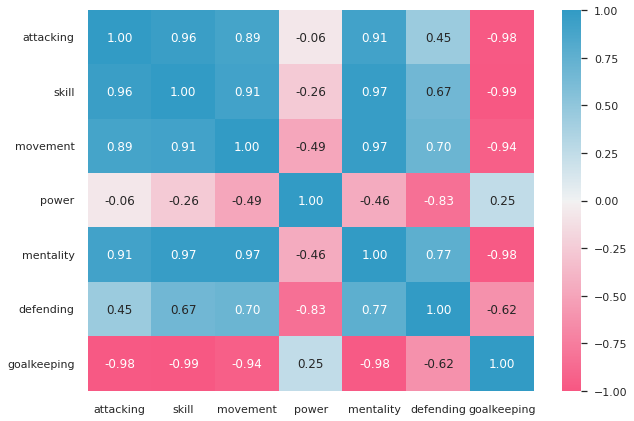

In [ ]:
sns.heatmap(df_ModePos.corr(), annot=True, fmt=".2f", cmap = cmap, vmin = -1, vmax = 1)

### Highly correlated attribute group for each positions

In [ ]:
arr = []
for i in name_GePoint:
  arr.append(df_ModePos[i].sort_values(ascending=False).head(2).to_frame().index.values)

In [ ]:
df_PosPlayer = pd.DataFrame(arr).transpose()
df_PosPlayer.columns = name_GePoint

In [ ]:
df_PosPlayer

,attacking,skill,movement,power,mentality,defending,goalkeeping
0,ST,CM,CB,ST,CM,CB,GK
1,CM,ST,ST,GK,CB,CM,CB


## Heat map between attributes in each position

In [ ]:
df['attacking'] = df[attacking].mean(axis = 1).astype(np.int64)
df['skill'] = df[skill].mean(axis = 1).astype(np.int64)
df['movement'] = df[movement].mean(axis = 1).astype(np.int64)
df['power'] = df[power].mean(axis = 1).astype(np.int64)
df['mentality'] = df[mentality].mean(axis = 1).astype(np.int64)
df['defending'] = df[defending].mean(axis = 1).astype(np.int64)
df['goalkeeping'] = df[goalkeeping].mean(axis = 1).astype(np.int64)

In [ ]:
df_ST = df[df['GeneralPosition'] == 'ST']
df_CM = df[df['GeneralPosition'] == 'CM']
df_CB = df[df['GeneralPosition'] == 'CB']
df_GK = df[df['GeneralPosition'] == 'GK']

In [ ]:
heatmap_ST = df_ST[name_GePoint].corr()
heatmap_CM = df_CM[name_GePoint].corr()
heatmap_CB = df_CB[name_GePoint].corr()
heatmap_GK = df_GK[name_GePoint].corr()
sns.set(rc = {'figure.figsize':(7,5)})

### ST

In [ ]:
# Tương quan Mạnh
heatmap_ST[(abs(heatmap_ST) >= 0.8) & (heatmap_ST !=1)]

,attacking,skill,movement,power,mentality,defending,goalkeeping
attacking,NaN,0.876984,NaN,NaN,0.821305,NaN,NaN
skill,0.876984,NaN,NaN,NaN,NaN,NaN,NaN
movement,NaN,NaN,NaN,NaN,NaN,NaN,NaN
power,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mentality,0.821305,NaN,NaN,NaN,NaN,NaN,NaN
defending,NaN,NaN,NaN,NaN,NaN,NaN,NaN
goalkeeping,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Tương quan Vừa
heatmap_ST[(abs(heatmap_ST) > 0.5) & (abs(heatmap_ST) < 0.8) & (heatmap_ST !=1)]

,attacking,skill,movement,power,mentality,defending,goalkeeping
attacking,NaN,NaN,NaN,0.628648,NaN,NaN,NaN
skill,NaN,NaN,NaN,NaN,0.735445,NaN,NaN
movement,NaN,NaN,NaN,NaN,NaN,NaN,NaN
power,0.628648,NaN,NaN,NaN,0.723296,NaN,NaN
mentality,NaN,0.735445,NaN,0.723296,NaN,0.505081,NaN
defending,NaN,NaN,NaN,NaN,0.505081,NaN,NaN
goalkeeping,NaN,NaN,NaN,NaN,NaN,NaN,NaN


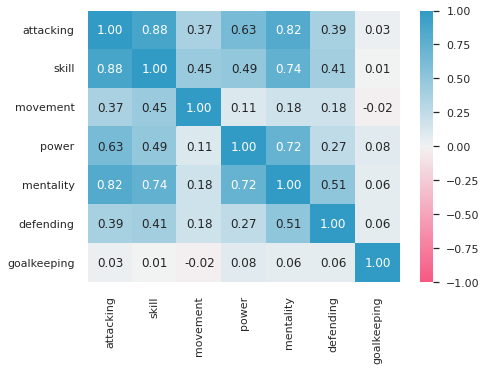

In [ ]:
sns.heatmap(heatmap_ST, annot=True, fmt=".2f", cmap = cmap, vmin=-1, vmax=1)

### CM

In [ ]:
# Tương quan Mạnh
heatmap_CM[(abs(heatmap_CM) >= 0.8) & (heatmap_CM !=1)]

,attacking,skill,movement,power,mentality,defending,goalkeeping
attacking,NaN,0.871793,NaN,NaN,NaN,NaN,NaN
skill,0.871793,NaN,NaN,NaN,NaN,NaN,NaN
movement,NaN,NaN,NaN,NaN,NaN,NaN,NaN
power,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mentality,NaN,NaN,NaN,NaN,NaN,NaN,NaN
defending,NaN,NaN,NaN,NaN,NaN,NaN,NaN
goalkeeping,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Tương quan Vừa
heatmap_CM[(abs(heatmap_CM) > 0.5) & (abs(heatmap_CM) < 0.8) & (heatmap_CM !=1)]

,attacking,skill,movement,power,mentality,defending,goalkeeping
attacking,NaN,NaN,NaN,0.574661,0.650418,NaN,NaN
skill,NaN,NaN,NaN,0.583651,0.740354,NaN,NaN
movement,NaN,NaN,NaN,NaN,NaN,NaN,NaN
power,0.574661,0.583651,NaN,NaN,0.753459,NaN,NaN
mentality,0.650418,0.740354,NaN,0.753459,NaN,0.628917,NaN
defending,NaN,NaN,NaN,NaN,0.628917,NaN,NaN
goalkeeping,NaN,NaN,NaN,NaN,NaN,NaN,NaN


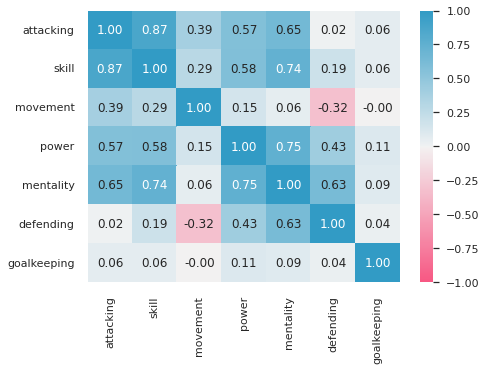

In [ ]:
sns.heatmap(heatmap_CM, annot=True, fmt=".2f", cmap = cmap, vmin=-1, vmax=1)

### CB

In [ ]:
# Tương quan Mạnh
heatmap_CB[(abs(heatmap_CB) >= 0.8) & (heatmap_CB !=1)]

,attacking,skill,movement,power,mentality,defending,goalkeeping
attacking,NaN,0.892313,NaN,NaN,0.829534,NaN,NaN
skill,0.892313,NaN,NaN,NaN,0.844421,NaN,NaN
movement,NaN,NaN,NaN,NaN,NaN,NaN,NaN
power,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mentality,0.829534,0.844421,NaN,NaN,NaN,NaN,NaN
defending,NaN,NaN,NaN,NaN,NaN,NaN,NaN
goalkeeping,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Tương quan Vừa
heatmap_CB[(abs(heatmap_CB) > 0.5) & (abs(heatmap_CB) < 0.8) & (heatmap_CB !=1)]

,attacking,skill,movement,power,mentality,defending,goalkeeping
attacking,NaN,NaN,0.580161,0.662765,NaN,NaN,NaN
skill,NaN,NaN,0.560539,0.668510,NaN,NaN,NaN
movement,0.580161,0.560539,NaN,NaN,NaN,NaN,NaN
power,0.662765,0.668510,NaN,NaN,0.739892,NaN,NaN
mentality,NaN,NaN,NaN,0.739892,NaN,0.623626,NaN
defending,NaN,NaN,NaN,NaN,0.623626,NaN,NaN
goalkeeping,NaN,NaN,NaN,NaN,NaN,NaN,NaN


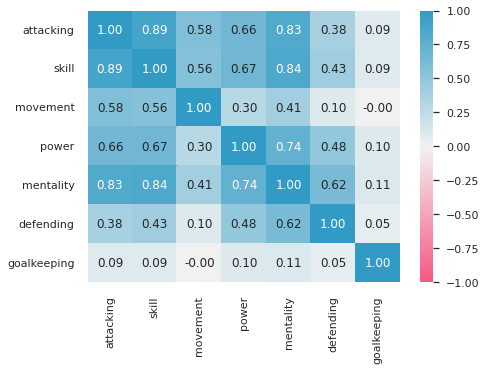

In [ ]:
sns.heatmap(heatmap_CB, annot=True, fmt=".2f", cmap = cmap, vmin=-1, vmax=1)

### GK

In [ ]:
# Tương quan Mạnh
heatmap_GK[(abs(heatmap_GK) >= 0.8) & (heatmap_GK !=1)]

,attacking,skill,movement,power,mentality,defending,goalkeeping
attacking,NaN,NaN,NaN,NaN,NaN,NaN,NaN
skill,NaN,NaN,NaN,NaN,NaN,NaN,NaN
movement,NaN,NaN,NaN,NaN,NaN,NaN,NaN
power,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mentality,NaN,NaN,NaN,NaN,NaN,NaN,NaN
defending,NaN,NaN,NaN,NaN,NaN,NaN,NaN
goalkeeping,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Tương quan Vừa
heatmap_GK[(abs(heatmap_GK) > 0.5) & (abs(heatmap_GK) < 0.8) & (heatmap_GK !=1)]

,attacking,skill,movement,power,mentality,defending,goalkeeping
attacking,NaN,0.674834,0.546096,0.570023,0.623549,NaN,NaN
skill,0.674834,NaN,NaN,0.501238,0.568686,NaN,NaN
movement,0.546096,NaN,NaN,0.723369,0.630292,NaN,NaN
power,0.570023,0.501238,0.723369,NaN,0.696212,NaN,NaN
mentality,0.623549,0.568686,0.630292,0.696212,NaN,NaN,NaN
defending,NaN,NaN,NaN,NaN,NaN,NaN,NaN
goalkeeping,NaN,NaN,NaN,NaN,NaN,NaN,NaN


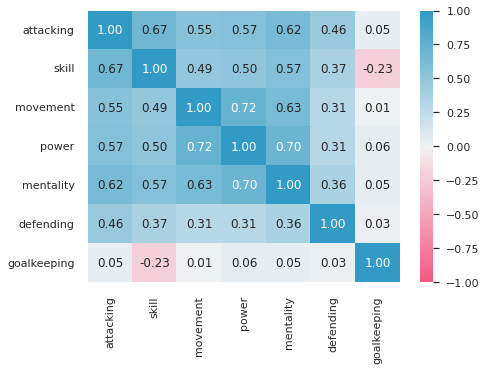

In [ ]:
sns.heatmap(heatmap_GK, annot=True, fmt=".2f", cmap = cmap, vmin=-1, vmax=1)

## Correlation between positions

In [ ]:
df_p2p = df_ModePos.transpose()
heatmap_p2p = df_p2p[name_Position].corr()
heatmap_p2p

GeneralPosition,ST,CM,CB,GK
GeneralPosition,,,,
ST,1.000000,0.723523,0.574815,0.549937
CM,0.723523,1.000000,0.926131,0.286202
CB,0.574815,0.926131,1.000000,0.292319
GK,0.549937,0.286202,0.292319,1.000000


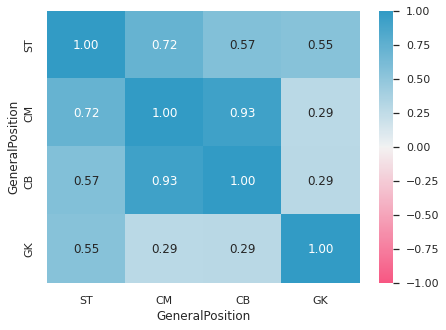

In [ ]:
sns.heatmap(heatmap_p2p, annot=True, fmt=".2f", cmap = cmap, vmin=-1, vmax=1)

## Correlation between detailed attributes of each position

In [ ]:
df_ST_train = df_ST[defending + power + movement + skill + attacking]
df_CM_train = df_CM[defending + mentality + movement + skill + attacking]
df_CB_train = df_CB[defending + mentality]
df_GK_train = df_GK[goalkeeping + power]

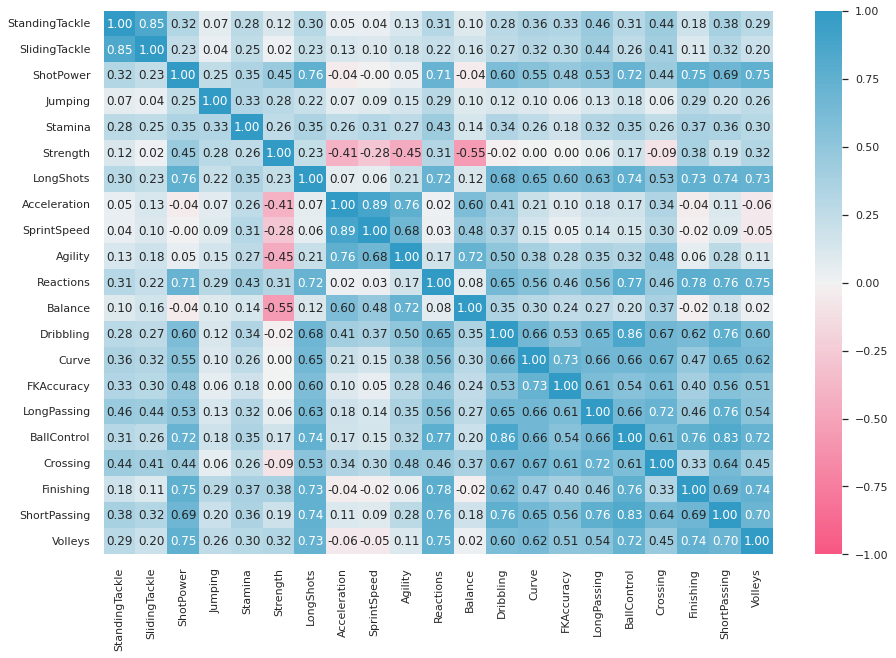

In [ ]:
sns.set(rc = {'figure.figsize':(15,10)})
sns.heatmap(df_ST_train.corr(), annot=True, fmt=".2f", cmap = cmap, vmin=-1, vmax=1)

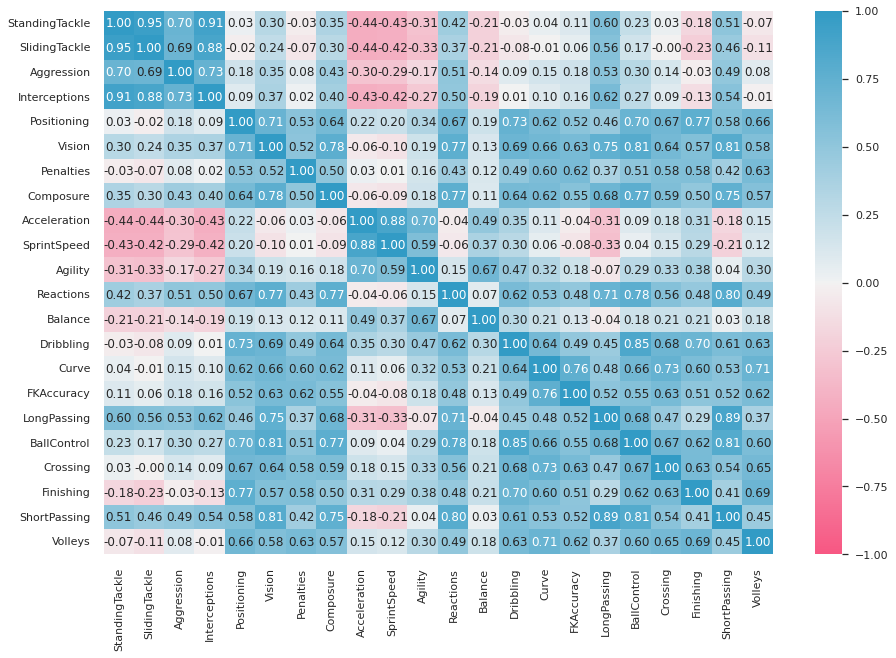

In [ ]:
sns.set(rc = {'figure.figsize':(15,10)})
sns.heatmap(df_CM_train.corr(), annot=True, fmt=".2f", cmap = cmap, vmin=-1, vmax=1)

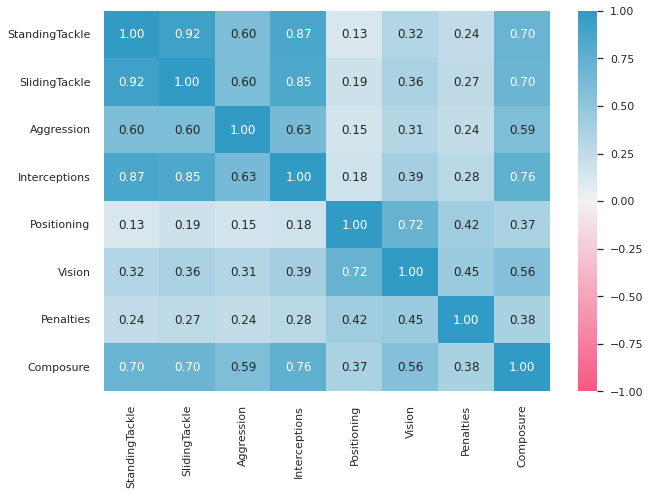

In [ ]:
sns.set(rc = {'figure.figsize':(10,7)})
sns.heatmap(df_CB_train.corr(), annot=True, fmt=".2f", cmap = cmap, vmin=-1, vmax=1)

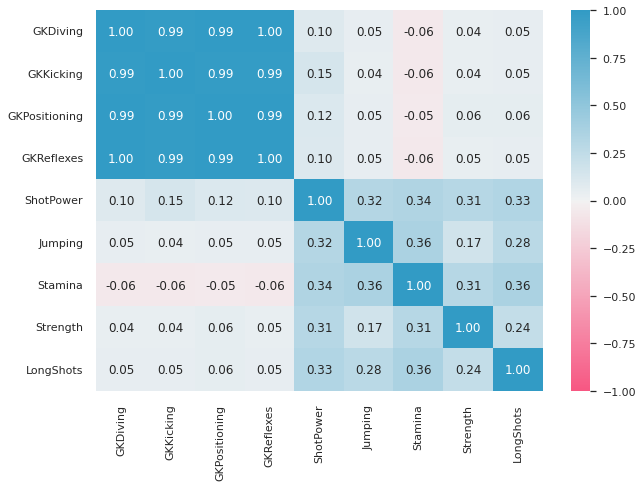

In [ ]:
sns.set(rc = {'figure.figsize':(10,7)})
sns.heatmap(df_GK_train.corr(), annot=True, fmt=".2f", cmap = cmap, vmin=-1, vmax=1)

## Dataframe for line_polar

In [ ]:
df_GePos = df.groupby('GeneralPosition').mean()

In [ ]:
df_GePoint = df_GePos[attacking].mean(axis = 1).to_frame()
df_GePoint.columns = ['attacking']
df_GePoint['skill'] = df_GePos[skill].mean(axis = 1)
df_GePoint['movement'] = df_GePos[movement].mean(axis = 1)
df_GePoint['power'] = df_GePos[power].mean(axis = 1)
df_GePoint['mentality'] = df_GePos[mentality].mean(axis = 1)
df_GePoint['defending'] = df_GePos[defending].mean(axis = 1)
df_GePoint['goalkeeping'] = df_GePos[goalkeeping].mean(axis = 1)

In [ ]:
df_GePoint

,attacking,skill,movement,power,mentality,defending,goalkeeping
GeneralPosition,,,,,,,
CB,47.182879,51.603083,63.374547,61.314684,55.444005,66.696209,10.403510
CM,59.804664,63.154893,69.862846,63.490425,59.297537,50.533151,10.337992
GK,16.514964,19.246277,45.035474,42.382263,26.503345,13.875182,40.901642
ST,60.705476,57.193331,68.511633,66.915195,56.226222,27.097764,10.406120


In [ ]:
df_GePoint.to_csv('FiFA22_General_Position.csv', index=True, header=True)

## line_polar

In [ ]:
have_position = ['GK','CB', 'CM', 'ST']
have_target = ['attacking', 'skill', 'movement', 'power', 'mentality', 'defending']

point = []
position = []
target = []

for i in range(df_GePoint.shape[0]):
  for j in range(df_GePoint.shape[1]):
    if (df_GePoint.index[i] in have_position) & (df_GePoint.columns[j] in have_target):
      point.append(df_GePoint.iloc[i,j])
      position.append(df_GePoint.index[i])
      target.append(df_GePoint.columns[j])

dict_columns = {'target':target, 'position':position, 'point':point}
df_new = pd.DataFrame(dict_columns)

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()

player1 = 'K. De Bruyne'
player2 = 'Bruno Fernandes'

fig.add_trace(
              go.Scatterpolar(
                              r=df[df.Name == player1][df.columns[54:61]].values[0],
                              theta=df.columns[54:61],
                              fill='toself',
                              name = player1,
                              showlegend=True,
                              )
              )

fig.update_layout(
    polar=dict(
        radialaxis=dict(
                        visible=True,
                        range=[0, 100]
                    )
            ),
    title="Mạng lưới chỉ số nhóm cầu thủ"
)
fig.show()

In [ ]:
import plotly.express as px
temp_theta = target
temp_color = position
fig = px.line_polar(df_new, r=point, theta=temp_theta, color=temp_color, line_close=True,
                    color_discrete_sequence=px.colors.qualitative.Light24)

fig.update_layout(
    polar=dict(
        radialaxis=dict(
                        visible=True,
                        range=[0, 100]
                    )
            ),
    title="Compare between positions"
)

fig.update_traces(fill='toself')
fig.show()

In [ ]:
df.to_csv('FiFA22.csv', index=False, header=True)

## Overall

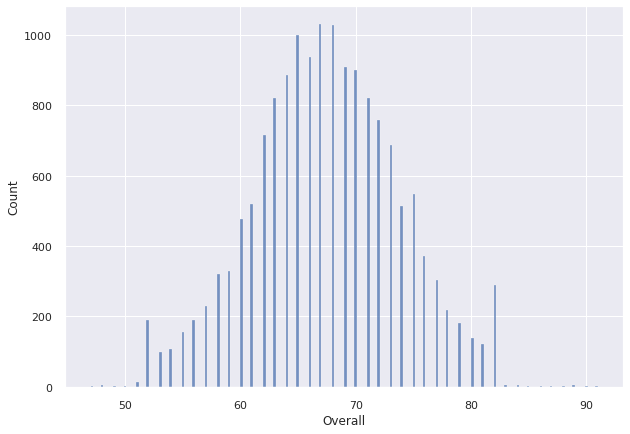

In [ ]:
import seaborn as sns
sns.histplot(df.Overall, bins=200)

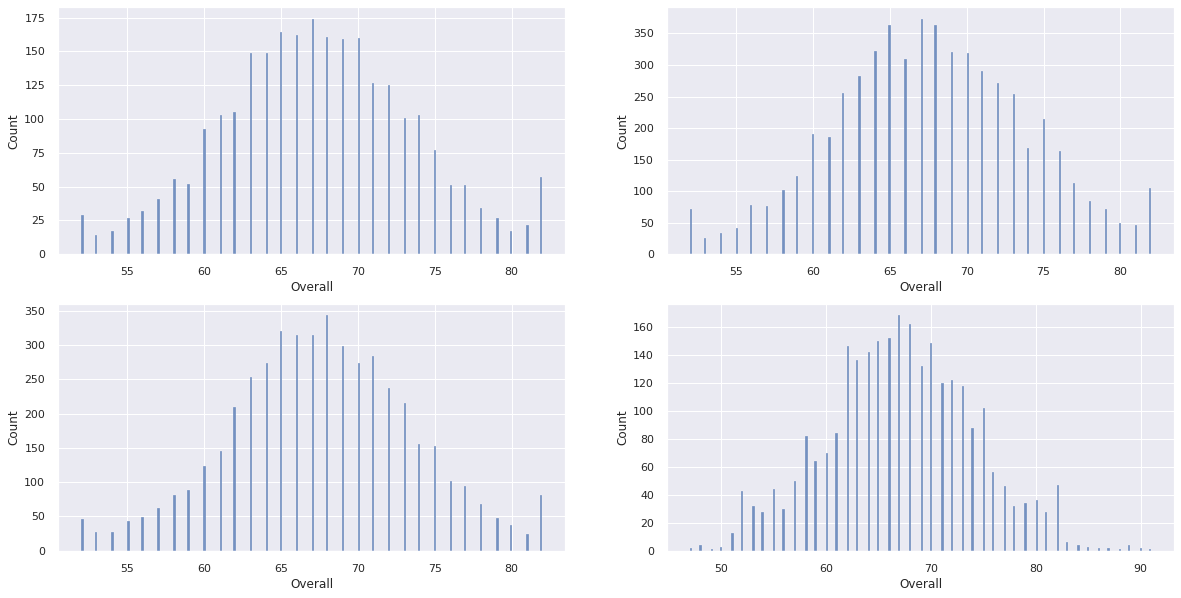

In [ ]:
fig, ax = plt.subplots(figsize=(20,10), ncols=2, nrows=2)

sns.histplot(df[df['GeneralPosition'] == 'ST'].Overall, bins=200, ax = ax[0, 0])
sns.histplot(df[df['GeneralPosition'] == 'CM'].Overall, bins=200, ax = ax[0, 1])
sns.histplot(df[df['GeneralPosition'] == 'CB'].Overall, bins=200, ax = ax[1, 0])
sns.histplot(df[df['GeneralPosition'] == 'GK'].Overall, bins=200, ax = ax[1, 1])

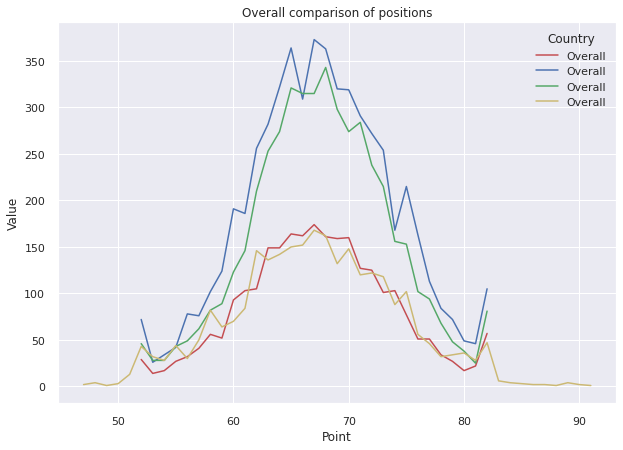

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
textprops = {"fontsize": 20}

df_ST.Overall.value_counts().sort_index().plot(kind = 'line', color = 'r')
df_CM.Overall.value_counts().sort_index().plot(kind = 'line', color = 'b')
df_CB.Overall.value_counts().sort_index().plot(kind = 'line', color = 'g')
df_GK.Overall.value_counts().sort_index().plot(kind = 'line', color = 'y')

plt.legend(title = "Country")
plt.title('Overall comparison of positions')
plt.ylabel('Value')
plt.xlabel('Point')

plt.show()

## Distribution of positions

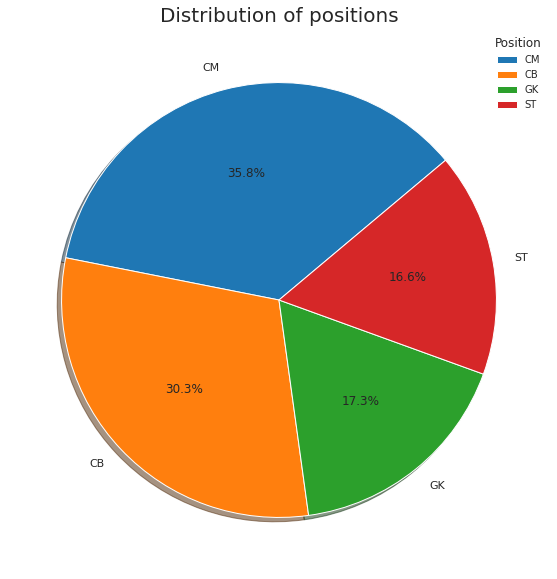

In [ ]:
import matplotlib.colors as colors

plt.figure(figsize=(10,10))
labels = df['GeneralPosition'].value_counts().index
size = df['GeneralPosition'].value_counts()
plt.pie(size,labels = labels, shadow =True, autopct='%1.1f%%', colors = colors.TABLEAU_COLORS ,startangle = 40)
plt.title('Distribution of positions', fontsize = 20)
plt.legend(labels, title = 'Position',loc='upper right',fontsize = 10)
plt.show();

## Skill Moves of Players segregated by Position

In [ ]:
name = name_GePoint
name.append('GeneralPosition')

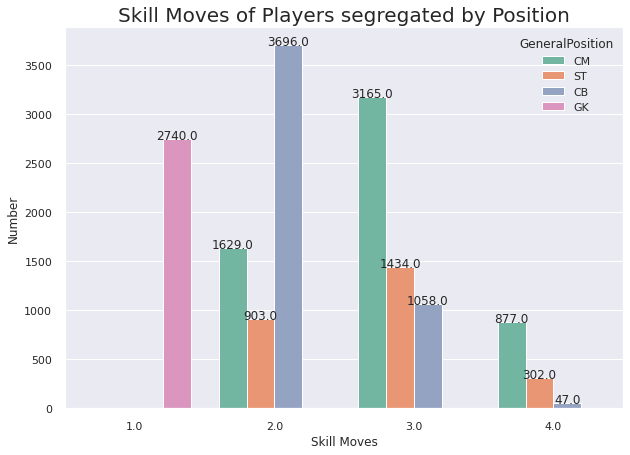

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
graph = sns.countplot(ax=ax,x=df['Skill Moves'], data=df, hue='GeneralPosition', palette = 'Set2')
plt.title('Skill Moves of Players segregated by Position'  , fontsize = 20)
plt.xlabel('Skill Moves')
plt.ylabel('Number')
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center");